import tensorflow as tf
import tensorflow_datasets as tfds
from keras.datasets import mnist
import numpy as np
import logging
import time
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

tf.autograph.set_verbosity(0)
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [2]:
### Get MNIST dataset and condition it for training it


(ds_train, y_train),(ds_test, y_test) = mnist.load_data()

ds_train = ds_train.astype('float32')
ds_test = ds_test.astype('float32')
ds_train = ds_train/255.0
ds_test = ds_test/255.0
ds_train = ds_train.reshape(-1, 28, 28, 1)
ds_test = ds_test.reshape(-1, 28, 28, 1)

### Get only 6000 images of each class for training
# rand_indices = np.random.choice(np.array(np.where(y_train == 0)).reshape(-1), size = 600)
# ds_train_final = ds_train[rand_indices]
# y_train_final = y_train[rand_indices]
# for i in range(1, 10):
#     rand_indices = np.random.choice(np.array(np.where(y_train == i)).reshape(-1), size = 600)
#     ds_train_final = np.append(ds_train_final, ds_train[rand_indices], axis = 0)
#     y_train_final = np.append(y_train_final, y_train[rand_indices], axis = 0)

print("Train data shape: " + str(ds_train.shape))
# print(y_train.shape)
print("Test data shape: " + str(ds_test.shape))
# print(y_test.shape)

Train data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [3]:
### Create a keras model to train and then make 4 other versions of it different from the base

base_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

base_model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

print(base_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 32)         0

In [4]:
### Train the model
training_start_time = time.time()

base_model.fit(
    ds_train, 
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_data = (ds_test, y_test)
)

training_end_time = time.time()
print("Total training time elapsed: " + str(training_end_time - training_start_time))

Epoch 1/10
469/469 [==============================] - 16s 34ms/step - loss: 0.4339 - sparse_categorical_accuracy: 0.8720 - val_loss: 0.1652 - val_sparse_categorical_accuracy: 0.9511
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1349 - sparse_categorical_accuracy: 0.9598 - val_loss: 0.0977 - val_sparse_categorical_accuracy: 0.9707
Epoch 3/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1002 - sparse_categorical_accuracy: 0.9696 - val_loss: 0.0900 - val_sparse_categorical_accuracy: 0.9735
Epoch 4/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0833 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0741 - val_sparse_categorical_accuracy: 0.9772
Epoch 5/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0714 - sparse_categorical_accuracy: 0.9785 - val_loss: 0.0734 - val_sparse_categorical_accuracy: 0.9770
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0624 - spars

In [5]:
### Save the base model

base_model.save_weights('base_model_weights')

In [6]:
### Creation of the confusion matrix for base model

### Get predictions for each of the test datapoints

test_prediction_start_time = time.time()

pred_y_test = base_model.predict(ds_test)

test_prediction_end_time = time.time()

print("Total test prediction time: " + str(test_prediction_end_time - test_prediction_start_time))

313/313 [==============================] - 1s 3ms/step
Total test prediction time: 1.3540394306182861


In [27]:
y_test_pred = pred_y_test.argmax(axis = 1)

### Create confusion matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

[[ 965    1    4    0    3    0    3    2    0    2]
 [   0 1105    5    6    1    2   12    2    2    0]
 [   3    0 1016    2    0    0    0   10    0    1]
 [   0    0    2 1000    0    6    0    2    0    0]
 [   1    0    2    0  970    0    3    0    0    6]
 [   2    0    0    5    0  882    1    1    1    0]
 [   5    1    1    0    5    6  939    0    1    0]
 [   1    1   21    7    0    1    0  997    0    0]
 [   5    0    5    7    3    7    1    2  938    6]
 [   3    0    0    2    7   10    0    3    2  982]]


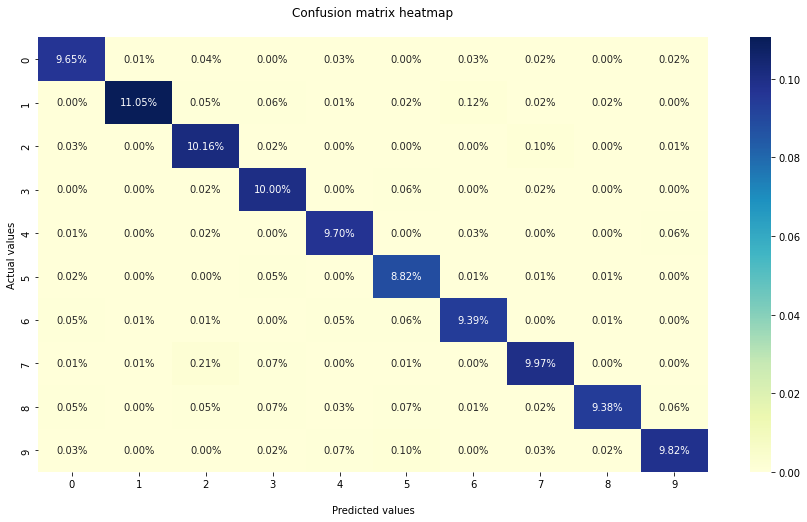

In [35]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap = 'YlGnBu', fmt = '.2%')
ax.set_title('Confusion matrix heatmap\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')

plt.gcf().set_size_inches(15, 8)

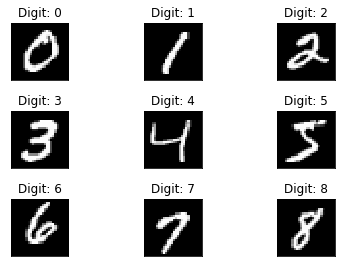

In [53]:
#### Dataset view for display

arr_indices = [(np.where(y_train == 0))[0][0], (np.where(y_train == 1))[0][0], (np.where(y_train == 2))[0][0], (np.where(y_train == 3))[0][0], (np.where(y_train == 4))[0][0], (np.where(y_train == 5))[0][0], (np.where(y_train == 6))[0][0], (np.where(y_train == 7))[0][0], (np.where(y_train == 8))[0][0], (np.where(y_train == 9))[0][0]]

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(ds_train[arr_indices[i]], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(i))
  plt.xticks([])
  plt.yticks([])


Some misclassification examples


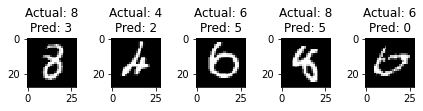

In [70]:
### Showing outputs of some misclassified digits
misclassified_indices = []
for i in range(len(y_test)):
    if y_test[i] != y_test_pred[i]:
        misclassified_indices.append(i)
        if len(misclassified_indices) == 5:
            break

fig = plt.figure()
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.tight_layout()
    plt.imshow(ds_test[misclassified_indices[i]], cmap = 'gray', interpolation = 'none')
    plt.title("Actual: {}\nPred: {}".format(y_test[misclassified_indices[i]], y_test_pred[misclassified_indices[i]]))
print("Some misclassification examples")

In [109]:
### Preprocessing of car images for input to our neural network
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])/255.0

image_loc_list = ['../08110.jpg', '../08100.jpg', '../08120.jpg', '../08125.jpg', '../08130.jpg', '../08133.jpg', '../08135.jpg', '../08141.jpg', '../08143.jpg', '../08090.jpg']
outlier_img = []
outlier_pred = []
for i in range(len(image_loc_list)):
    img = Image.open(image_loc_list[i])
    img = img.resize((28, 28))
    img = np.asarray(img).astype('float32')
    img_gray = rgb2gray(img)
    img_gray = img_gray.reshape((1, 28, 28, 1))
    outlier_img.append(img_gray)
    outlier_pred.append(base_model.predict(img_gray).argmax(axis = 1))


1/1 [==============================] - 0s 16ms/step


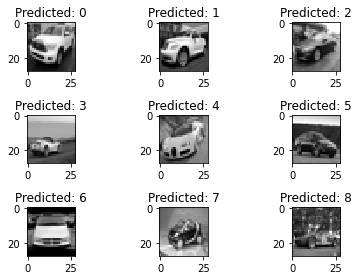

In [110]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.tight_layout()
    plt.imshow(outlier_img[i].reshape((28, 28)), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted: {}".format(i, outlier_pred[i]))


In [180]:
### We will first train 4 different models with different hyperparameters and then train them
### The multiple outlier test will be done with these different hyperparameters trained models
### The 2 hyperparameters that I will be changing are the number of kernels and the batch_size
### Because the MNIST dataset is not very complex. So to actually see some change in the model training
### let us try to make drastic changes to these values.

base_model_mod_kernel_count_4_epochs_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(4, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(4, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

base_model_mod_kernel_count_4_epochs_5.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

print(base_model_mod_kernel_count_4_epochs_5.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 13, 13, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 3, 3, 4)           148       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 1, 1, 4)        

In [181]:
training_start_time = time.time()

base_model_mod_kernel_count_4_epochs_5.fit(
    ds_train, 
    y_train,
    epochs = 5,
    batch_size = 128,
    validation_data = (ds_test, y_test)
)

training_end_time = time.time()
print("Total training time elapsed: " + str(training_end_time - training_start_time))

Epoch 1/5
469/469 [==============================] - 7s 15ms/step - loss: 1.7103 - sparse_categorical_accuracy: 0.3927 - val_loss: 1.0775 - val_sparse_categorical_accuracy: 0.6266
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.9393 - sparse_categorical_accuracy: 0.6802 - val_loss: 0.7944 - val_sparse_categorical_accuracy: 0.7327
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.7821 - sparse_categorical_accuracy: 0.7373 - val_loss: 0.6980 - val_sparse_categorical_accuracy: 0.7651
Epoch 4/5
469/469 [==============================] - 7s 14ms/step - loss: 0.7161 - sparse_categorical_accuracy: 0.7624 - val_loss: 0.6568 - val_sparse_categorical_accuracy: 0.7790
Epoch 5/5
469/469 [==============================] - 7s 14ms/step - loss: 0.6796 - sparse_categorical_accuracy: 0.7779 - val_loss: 0.6230 - val_sparse_categorical_accuracy: 0.7920
Total training time elapsed: 34.2290780544281


In [150]:
base_model_mod_kernel_count_4_epochs_5.save_weights('base_model_mod_kernel_count_4_epochs_5')

In [151]:
### Get predictions for each of the test datapoints

test_prediction_start_time = time.time()

pred_y_test = base_model_mod_kernel_count_4_epochs_5.predict(ds_test)

test_prediction_end_time = time.time()

print("Total test prediction time: " + str(test_prediction_end_time - test_prediction_start_time))

313/313 [==============================] - 1s 3ms/step
Total test prediction time: 1.1446704864501953


In [152]:
y_test_pred = pred_y_test.argmax(axis = 1)

### Create confusion matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

[[ 849    1   12    0    3    4   61    6   29   15]
 [   2 1074    6    0    2    1    7    3   34    6]
 [  17   34  781   60    2   13    3   48   60   14]
 [   0    1   48  868    0   44    0   31    6   12]
 [   4   21    0    0  854    0   41    4    2   56]
 [   6    1   17   31    0  715    0    1   49   72]
 [  33   10    0    0   20    0  864    0   26    5]
 [  13    3   61   31    8    1    0  875    1   35]
 [  69    2   70    6    1   43   28    6  720   29]
 [  28    1    8    2   40   33    3   18   14  862]]


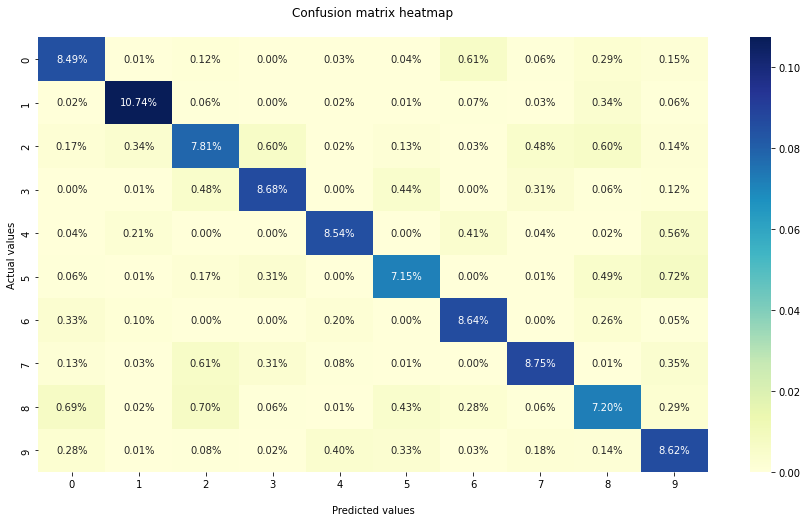

In [153]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap = 'YlGnBu', fmt = '.2%')
ax.set_title('Confusion matrix heatmap\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')

plt.gcf().set_size_inches(15, 8)

Some misclassification examples


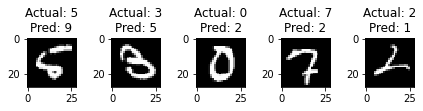

In [154]:
### Showing outputs of some misclassified digits
misclassified_indices = []
for i in range(len(y_test)):
    if y_test[i] != y_test_pred[i]:
        misclassified_indices.append(i)
        if len(misclassified_indices) == 5:
            break

fig = plt.figure()
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.tight_layout()
    plt.imshow(ds_test[misclassified_indices[i]], cmap = 'gray', interpolation = 'none')
    plt.title("Actual: {}\nPred: {}".format(y_test[misclassified_indices[i]], y_test_pred[misclassified_indices[i]]))
print("Some misclassification examples")

In [155]:
base_model_mod_kernel_count_64_epochs_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

base_model_mod_kernel_count_64_epochs_5.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

print(base_model_mod_kernel_count_64_epochs_5.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 1, 1, 64)       

In [156]:
training_start_time = time.time()

base_model_mod_kernel_count_64_epochs_5.fit(
    ds_train, 
    y_train,
    epochs = 5,
    batch_size = 128,
    validation_data = (ds_test, y_test)
)

training_end_time = time.time()
print("Total training time elapsed: " + str(training_end_time - training_start_time))

Epoch 1/5
469/469 [==============================] - 32s 68ms/step - loss: 0.3320 - sparse_categorical_accuracy: 0.9012 - val_loss: 0.1083 - val_sparse_categorical_accuracy: 0.9658
Epoch 2/5
469/469 [==============================] - 32s 67ms/step - loss: 0.0926 - sparse_categorical_accuracy: 0.9725 - val_loss: 0.0824 - val_sparse_categorical_accuracy: 0.9744
Epoch 3/5
469/469 [==============================] - 31s 67ms/step - loss: 0.0689 - sparse_categorical_accuracy: 0.9793 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9806
Epoch 4/5
469/469 [==============================] - 31s 66ms/step - loss: 0.0542 - sparse_categorical_accuracy: 0.9836 - val_loss: 0.0517 - val_sparse_categorical_accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 31s 67ms/step - loss: 0.0454 - sparse_categorical_accuracy: 0.9857 - val_loss: 0.0505 - val_sparse_categorical_accuracy: 0.9845
Total training time elapsed: 157.4696192741394


In [157]:
base_model_mod_kernel_count_64_epochs_5.save_weights('base_model_mod_kernel_count_64_epochs_5')

In [158]:
### Get predictions for each of the test datapoints

test_prediction_start_time = time.time()

pred_y_test = base_model_mod_kernel_count_64_epochs_5.predict(ds_test)

test_prediction_end_time = time.time()

print("Total test prediction time: " + str(test_prediction_end_time - test_prediction_start_time))

313/313 [==============================] - 2s 5ms/step
Total test prediction time: 2.630570411682129


In [159]:
y_test_pred = pred_y_test.argmax(axis = 1)

### Create confusion matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

[[ 974    1    1    0    0    1    1    2    0    0]
 [   0 1129    1    2    0    0    1    1    1    0]
 [   4    1 1010    2    1    0    3    9    2    0]
 [   0    0    2  998    0    5    0    4    1    0]
 [   1    0    2    1  950    0    8    1    1   18]
 [   2    0    0    4    0  880    2    1    1    2]
 [   3    1    0    0    1    2  950    0    1    0]
 [   1    2   14    2    0    1    0 1003    5    0]
 [   1    1    1    1    1    1    0    0  965    3]
 [   5    1    1    0    2    4    1    6    3  986]]


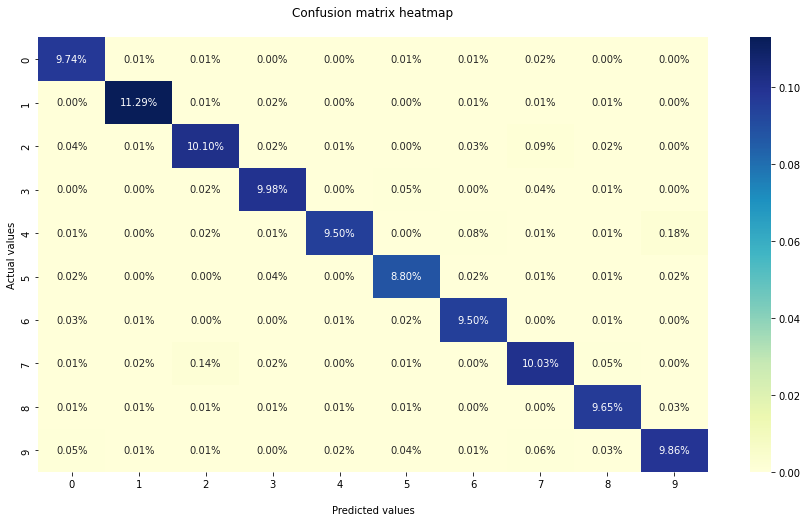

In [160]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap = 'YlGnBu', fmt = '.2%')
ax.set_title('Confusion matrix heatmap\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')

plt.gcf().set_size_inches(15, 8)

Some misclassification examples


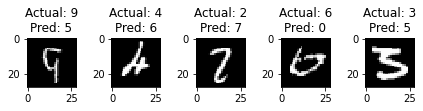

In [161]:
### Showing outputs of some misclassified digits
misclassified_indices = []
for i in range(len(y_test)):
    if y_test[i] != y_test_pred[i]:
        misclassified_indices.append(i)
        if len(misclassified_indices) == 5:
            break

fig = plt.figure()
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.tight_layout()
    plt.imshow(ds_test[misclassified_indices[i]], cmap = 'gray', interpolation = 'none')
    plt.title("Actual: {}\nPred: {}".format(y_test[misclassified_indices[i]], y_test_pred[misclassified_indices[i]]))
print("Some misclassification examples")

In [178]:
base_model_mod_kernel_count_4_epochs_20 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(4, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(4, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(4, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

base_model_mod_kernel_count_4_epochs_20.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

print(base_model_mod_kernel_count_4_epochs_20.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 13, 13, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 11, 11, 4)         148       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 3, 3, 4)           148       
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 1, 1, 4)        

In [179]:
training_start_time = time.time()

base_model_mod_kernel_count_4_epochs_20.fit(
    ds_train, 
    y_train,
    epochs = 20,
    batch_size = 128,
    validation_data = (ds_test, y_test)
)

training_end_time = time.time()
print("Total training time elapsed: " + str(training_end_time - training_start_time))

Epoch 1/20
469/469 [==============================] - 7s 15ms/step - loss: 1.9159 - sparse_categorical_accuracy: 0.2974 - val_loss: 1.5810 - val_sparse_categorical_accuracy: 0.4450
Epoch 2/20
469/469 [==============================] - 7s 14ms/step - loss: 1.4981 - sparse_categorical_accuracy: 0.4656 - val_loss: 1.3497 - val_sparse_categorical_accuracy: 0.5487
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 1.2828 - sparse_categorical_accuracy: 0.5612 - val_loss: 1.1756 - val_sparse_categorical_accuracy: 0.5994
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 1.1671 - sparse_categorical_accuracy: 0.6079 - val_loss: 1.0916 - val_sparse_categorical_accuracy: 0.6450
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 1.0928 - sparse_categorical_accuracy: 0.6376 - val_loss: 0.9988 - val_sparse_categorical_accuracy: 0.6809
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.9577 - sparse_cate

In [166]:
base_model_mod_kernel_count_4_epochs_20.save_weights('base_model_mod_kernel_count_4_epochs_20')

In [167]:
### Get predictions for each of the test datapoints

test_prediction_start_time = time.time()

pred_y_test = base_model_mod_kernel_count_4_epochs_20.predict(ds_test)

test_prediction_end_time = time.time()

print("Total test prediction time: " + str(test_prediction_end_time - test_prediction_start_time))

313/313 [==============================] - 1s 3ms/step
Total test prediction time: 1.1299550533294678


In [168]:
y_test_pred = pred_y_test.argmax(axis = 1)

### Create confusion matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

[[ 838    7   29    0   62   20    1    1   22    0]
 [  11 1109    2    2    1    1    0    2    7    0]
 [  44    9  821  120    5   15    0    7   11    0]
 [   3    3  124  775    0    3    0   47   55    0]
 [  58    0    1    0  748   40  101    0   18   16]
 [  43    3   18   16   30  490    7   11  194   80]
 [   2    1    0    0  125   17  803    0    7    3]
 [   1    2    6  123    0    3    0  829   32   32]
 [  44    7   23   37   23  185    8   23  484  140]
 [   9    0    2    1    6  103    3   19   75  791]]


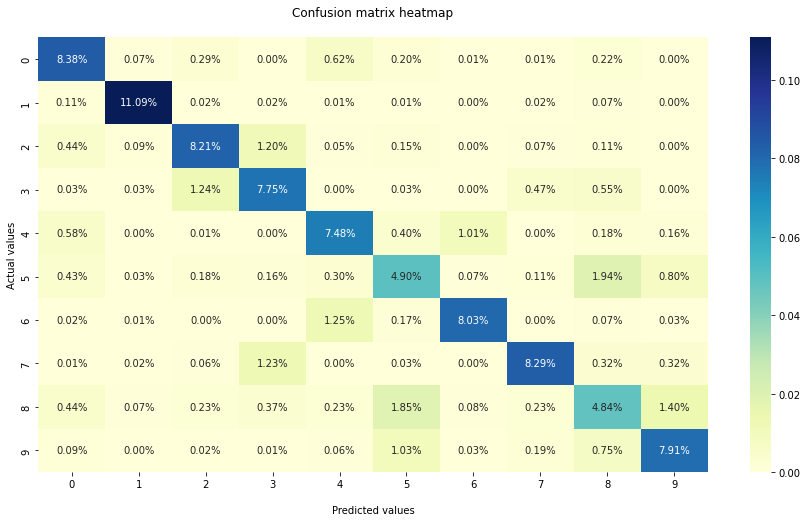

In [169]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap = 'YlGnBu', fmt = '.2%')
ax.set_title('Confusion matrix heatmap\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')

plt.gcf().set_size_inches(15, 8)

Some misclassification examples


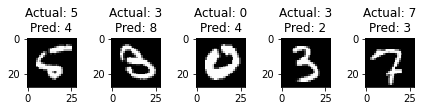

In [170]:
### Showing outputs of some misclassified digits
misclassified_indices = []
for i in range(len(y_test)):
    if y_test[i] != y_test_pred[i]:
        misclassified_indices.append(i)
        if len(misclassified_indices) == 5:
            break

fig = plt.figure()
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.tight_layout()
    plt.imshow(ds_test[misclassified_indices[i]], cmap = 'gray', interpolation = 'none')
    plt.title("Actual: {}\nPred: {}".format(y_test[misclassified_indices[i]], y_test_pred[misclassified_indices[i]]))
print("Some misclassification examples")

In [171]:
base_model_mod_kernel_count_64_epochs_20 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

base_model_mod_kernel_count_64_epochs_20.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]
)

print(base_model_mod_kernel_count_64_epochs_20.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_51 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 1, 1, 64)       

In [172]:
training_start_time = time.time()

base_model_mod_kernel_count_64_epochs_20.fit(
    ds_train, 
    y_train,
    epochs = 20,
    batch_size = 128,
    validation_data = (ds_test, y_test)
)

training_end_time = time.time()
print("Total training time elapsed: " + str(training_end_time - training_start_time))

Epoch 1/20
469/469 [==============================] - 32s 67ms/step - loss: 0.3200 - sparse_categorical_accuracy: 0.9031 - val_loss: 0.1029 - val_sparse_categorical_accuracy: 0.9706
Epoch 2/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9708 - val_loss: 0.0666 - val_sparse_categorical_accuracy: 0.9808
Epoch 3/20
469/469 [==============================] - 32s 67ms/step - loss: 0.0674 - sparse_categorical_accuracy: 0.9792 - val_loss: 0.0550 - val_sparse_categorical_accuracy: 0.9831
Epoch 4/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9836 - val_loss: 0.0527 - val_sparse_categorical_accuracy: 0.9836
Epoch 5/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0452 - sparse_categorical_accuracy: 0.9861 - val_loss: 0.0504 - val_sparse_categorical_accuracy: 0.9851
Epoch 6/20
469/469 [==============================] - 32s 68ms/step - loss: 0.0382 - spars

In [173]:
base_model_mod_kernel_count_64_epochs_20.save_weights('base_model_mod_kernel_count_64_epochs_20')

In [174]:
### Get predictions for each of the test datapoints

test_prediction_start_time = time.time()

pred_y_test = base_model_mod_kernel_count_64_epochs_20.predict(ds_test)

test_prediction_end_time = time.time()

print("Total test prediction time: " + str(test_prediction_end_time - test_prediction_start_time))

313/313 [==============================] - 2s 5ms/step
Total test prediction time: 1.793287754058838


In [175]:
y_test_pred = pred_y_test.argmax(axis = 1)

### Create confusion matrix

cf_matrix = confusion_matrix(y_test, y_test_pred)
print(cf_matrix)

[[ 970    1    0    0    3    1    2    2    0    1]
 [   0 1131    1    0    0    0    1    1    0    1]
 [   2    0 1003    5    0    0    1   20    0    1]
 [   0    0    1 1004    0    4    0    1    0    0]
 [   0    0    0    0  965    0    2    0    0   15]
 [   0    0    0    8    0  881    1    1    1    0]
 [   3    2    1    0    2    2  946    0    2    0]
 [   0    3    2    3    0    1    0 1016    0    3]
 [   3    1    2    6    0    2    0    2  954    4]
 [   1    0    0    1    3    3    0    2    1  998]]


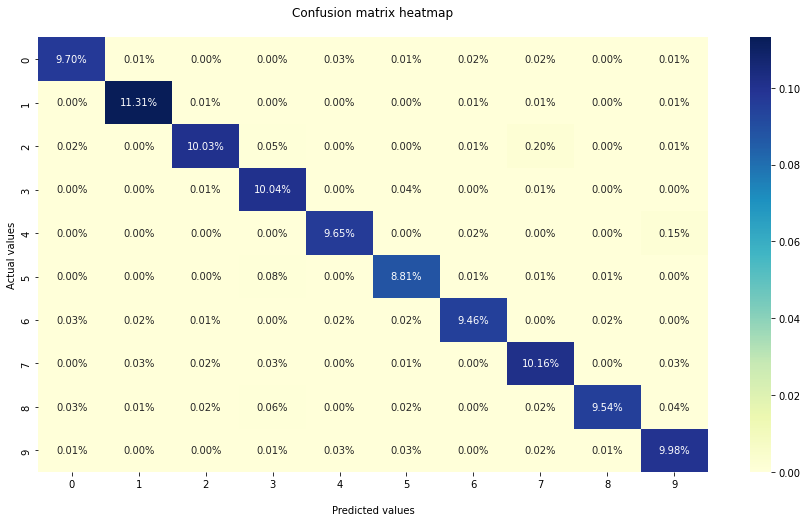

In [176]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, cmap = 'YlGnBu', fmt = '.2%')
ax.set_title('Confusion matrix heatmap\n')
ax.set_xlabel('\nPredicted values')
ax.set_ylabel('Actual values')

plt.gcf().set_size_inches(15, 8)

Some misclassification examples


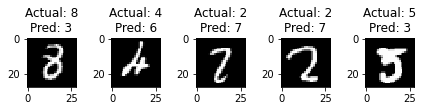

In [177]:
### Showing outputs of some misclassified digits
misclassified_indices = []
for i in range(len(y_test)):
    if y_test[i] != y_test_pred[i]:
        misclassified_indices.append(i)
        if len(misclassified_indices) == 5:
            break

fig = plt.figure()
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.tight_layout()
    plt.imshow(ds_test[misclassified_indices[i]], cmap = 'gray', interpolation = 'none')
    plt.title("Actual: {}\nPred: {}".format(y_test[misclassified_indices[i]], y_test_pred[misclassified_indices[i]]))
print("Some misclassification examples")